In [1]:
%matplotlib inline

from simulation.community import Community, VoteConstraints
from simulation.student import Student
from simulation.artifact import Quality
from reputation.algorithm import allAlgorithms
from output.chart import chart
from output.metrics import printMetrics, printStdDevMetrics

# Productivity Test - Low Competence


The more basic tests are concluded with the Productivity Test, which investigates
what kind of effect different levels of productivity, all other parameters being equal,
have on the reputation score.

In [2]:
testName = "Productivity-low"
community = Community()

### Actions

Action Prototypes


In [3]:
postGoodArtefact = community.createPostAction(Quality.GOOD)
postBadArtefact = community.createPostAction(Quality.BAD)
voteBadNegative = community.createVoteAction(Quality.BAD, VoteConstraints.BADART)
voteAnyNegative = community.createVoteAction(Quality.BAD, VoteConstraints.NONE)
voteGoodPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.GOODART)
voteAnyPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.NONE)

### Student Archetypes

Student with low productivity

In [4]:
lowStudent = Student("low",
        [
            (0.02, postGoodArtefact),
            (0.18, postBadArtefact),
            (0.04, voteBadNegative),
            (0.36, voteAnyNegative),
            (0.04, voteGoodPositive),
            (0.36, voteAnyPositive),
        ])
community.addStudents(lowStudent, 10)

Students with medium productivity

In [5]:
avgStudent = Student("avg",
        [
            (0.05, postGoodArtefact),
            (0.45, postBadArtefact),
            (0.025, voteBadNegative),
            (0.225, voteAnyNegative),
            (0.025, voteGoodPositive),
            (0.225, voteAnyPositive),
        ])
community.addStudents(avgStudent, 10)

Students with high productivity

In [6]:
highStudent = Student("high",
        [
            (0.08, postGoodArtefact),
            (0.72, postBadArtefact),
            (0.01, voteBadNegative),
            (0.09, voteAnyNegative),
            (0.01, voteGoodPositive),
            (0.09, voteAnyPositive),
        ])

community.addStudents(highStudent, 10)

## Synthesis

Reputation scores are based on 100 actions by the 30 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Mean & Std. Dev.: InDegree ########
Distinction: 0.576415905019 ± 0.496205980555
Correctness: 0.324666666667 ± 0.0788275191654
Inversion Quality: 0.4995 ± 0.0885367155478

######## Mean & Std. Dev.: InDegreePositive ########
Distinction: 1.3810713513 ± 0.849683020179
Correctness: 0.879333333333 ± 0.0657909146041
Inversion Quality: 0.9768 ± 0.0176504327929

######## Mean & Std. Dev.: EigenTrust ########
Distinction: 0.711823875832 ± 0.465296568689
Correctness: 0.593333333333 ± 0.0835330939076
Inversion Quality: 0.814733333333 ± 0.0547705922716

######## Mean & Std. Dev.: PageRank ########
Distinction: 0.984745878481 ± 0.57878807893
Correctness: 0.813666666667 ± 0.0730441266937
Inversion Quality: 0.954166666667 ± 0.0257784362943


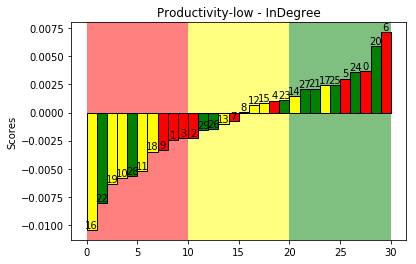

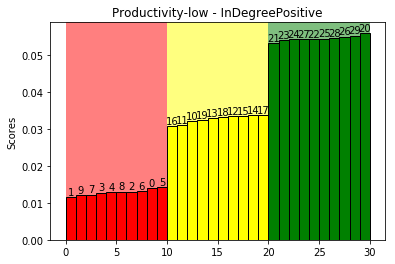

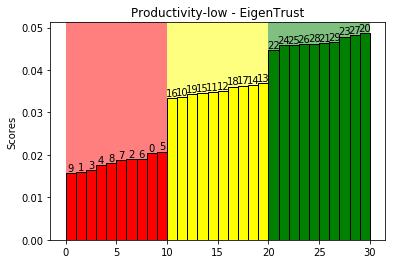

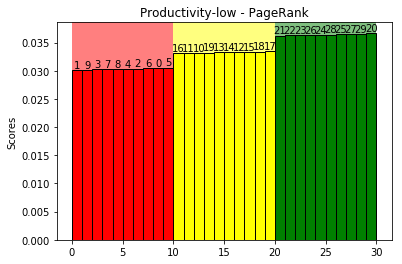

In [7]:
groups = ('low', 'avg', 'high')
colors = {'low': 'r', 'avg': 'yellow', 'high': 'g'}
results = community.run([InDegree(), InDegreePositive(), EigenTrust(), PageRank()], 100, 100)
for (name, result, intermediateResults) in results:
    c = chart(result, groups, colors, testName + " - " + name)
    # printMetrics(name, result, groups)
    printStdDevMetrics(name, intermediateResults, groups)